<a href="https://colab.research.google.com/github/akshatshah91/Game-AI/blob/master/HW3_Q_learning_vs_SARSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
alpha = 0.1
gamma = 0.5
epsilon = 0.1
episodes = 50000
tests = 10

In [9]:
def getAction(s,q,env,e):
  a = None
  if random.uniform(0,1) < e:
    a = env.action_space.sample()
  else:
    a = np.argmax(q[s,:])
  return a

In [15]:
def trainQ(env, q, fixedAlpha=True):
  s = env.reset()
  q = np.zeros((env.observation_space.n,env.action_space.n))
  alpha = 0.1
  for x in range(1, episodes+1):
    s = env.reset()
    gameOver = False
    if not fixedAlpha:
      alpha = 1/x
    while not gameOver:
      a = getAction(s,q,env,epsilon)
      sNew,r,gameOver,_ = env.step(a)
      q[s,a] += alpha*(r + gamma*np.max(q[sNew,:]) - q[s,a])
      s = sNew
  return q

In [16]:
def trainSARSA(env, q, fixedAlpha=True):
  s = env.reset()
  q = np.zeros((env.observation_space.n,env.action_space.n))
  alpha = 0.1
  for x in range(1,episodes+1):
    s = env.reset()
    gameOver = False
    if not fixedAlpha:
      alpha = 1/x
    a = getAction(s,q,env,epsilon)
    while not gameOver:
      sNew,r,gameOver,_ = env.step(a)
      aNew = getAction(sNew,q,env,epsilon)
      q[s,a] += alpha*(r + gamma*q[sNew,aNew] - q[s,a])
      s = sNew
      a = aNew
  return q

In [5]:
def test(env,q):
  rewards = []
  for x in range(1,tests+1):
    s = env.reset()
    reward = 0
    gameOver = False
    while not gameOver:
      a = np.argmax(q[s,:])
      s,r,gameOver,_ = env.step(a)
      reward += r
    rewards.append(reward)
  return rewards

Q-Learning with fixed alpha
Q-Learning with dynamic alpha
SARSA with fixed alpha
SARSA with dynamic alpha


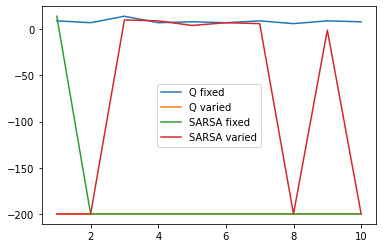

In [17]:
q = None
env = gym.make("Taxi-v3")
x = [1,2,3,4,5,6,7,8,9,10]

print("Q-Learning with fixed alpha")
q = trainQ(env,q)
r1 = test(env,q)
plt.plot(x,r1,label = "Q fixed")

print("Q-Learning with dynamic alpha")
q = trainQ(env,q,False)
r2 = test(env,q)
plt.plot(x,r2,label = "Q varied")

print("SARSA with fixed alpha")
q = trainSARSA(env,q)
r3 = test(env,q)
plt.plot(x,r3,label = "SARSA fixed")

print("SARSA with dynamic alpha")
trainSARSA(env,q,False)
q = r4 = test(env,q)
plt.plot(x,r4,label = "SARSA varied")
plt.legend()
plt.show()